In [ ]:
#khai báo thư viện 
import math as ma
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
create_data=[]
for i in range(0,180,2):
    array=[]
    for j in range(0,200,2):
        k=180-i-j
        x=50*ma.cos(ma.radians(i))+40*ma.cos(ma.radians(i+j))+30*ma.cos(ma.radians(i+j+k))
        y=50*ma.sin(ma.radians(i))+40*ma.sin(ma.radians(i+j))+30*ma.sin(ma.radians(i+j+k))
        array.append(np.array((i,j,k,x,y)))
    create_data.extend(array)

In [ ]:
header = ['alpha', 'beta', 'sigma' ,'x', 'y']
with open('robot_3d.csv', 'w', encoding='UTF8', newline='') as data_table:
    viet = csv.writer(data_table)
    viet.writerow(header)
    viet.writerows(create_data)

In [ ]:
data=pd.read_csv('robot_3d.csv')

In [ ]:
x_data=np.array(data.drop(['alpha','beta','sigma'],axis=1))
y_data=np.array(data[['alpha','beta','sigma']])
y_data.shape

(9000, 3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)
x_train.shape

(8100, 2)

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3,  activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 11,411
Trainable params: 11,411
Non-traina

In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=30)]) 

Epoch 1/1000
33/33 [==============================] - 2s 15ms/step - loss: 9920.5908 - mean_absolute_error: 83.8932 - val_loss: 10033.6641 - val_mean_absolute_error: 84.4080
Epoch 2/1000
33/33 [==============================] - 0s 7ms/step - loss: 8477.7188 - mean_absolute_error: 76.3368 - val_loss: 5651.3359 - val_mean_absolute_error: 58.4365
Epoch 3/1000
33/33 [==============================] - 0s 7ms/step - loss: 4245.4355 - mean_absolute_error: 49.3553 - val_loss: 3981.2573 - val_mean_absolute_error: 46.7925
Epoch 4/1000
33/33 [==============================] - 0s 7ms/step - loss: 3774.4312 - mean_absolute_error: 45.4206 - val_loss: 3844.4583 - val_mean_absolute_error: 45.9819
Epoch 5/1000
33/33 [==============================] - 0s 7ms/step - loss: 3680.5125 - mean_absolute_error: 44.7565 - val_loss: 3786.1787 - val_mean_absolute_error: 44.7806
Epoch 6/1000
33/33 [==============================] - 0s 7ms/step - loss: 3615.7493 - mean_absolute_error: 43.7080 - val_loss: 3714.1755 -

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mae:',score[1])

Test loss: 159.4555206298828
Test mae: 5.763224124908447


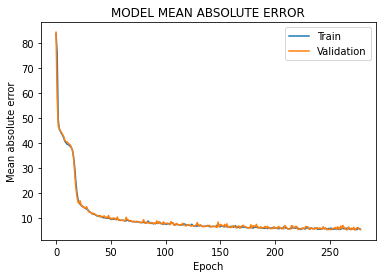

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()